In [22]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_iris
iris = load_iris()
X = np.array(iris.data) # массив numpy
Y = np.array(iris.target) # массив numpy

In [2]:
def split_data(df, dt, perception): #разделение датасета на тестовую и тренировочную
    split=np.array([random.random() < perception for i in range(len(df))])
    return df[split], df[~split], dt[split], dt[~split]
#distances = np.linalg.norm(X[1] - X[2], ord=2) #готовая евклидова метрика одной строчкой
#    dist = 0 #или своей функцией
#    for i in range(len(d1)):
#        dist += np.square(d1[i] - d2[i])
def InitializationCentre(X, k): #начальная инициализация центров кластеров
    init_centres = []
    for i in range(k):
        init_centres.append(random.choice(X))
    init_centres = np.array(init_centres)
    return init_centres
def Expectation(X, centres): #кластеризация с текущими центрами
    k = len(centres)
    distances = np.zeros((len(X), k)) #np.full((len(X), len(X[0])), X[0])
    predict = np.zeros(len(X))
    for c in range(k):
        for i in range(len(X)):
            distances[i][c] = np.linalg.norm(X[i] - centres[c], ord=2)
            predict[i] = np.argmin(distances[i])
    #dist_matrix = np.array([distances, Y])
    #sortD = dist_matrix[:, dist_matrix[0, :].argsort()] 
    return predict
def Maximization(X, centres, predict): #перерасчет координат центров
    cluster_nums = np.zeros(len(centres))
    new_centres = np.zeros((len(centres), len(X[0])))
    for i in range(len(predict)):
        cluster_nums[int(predict[i])] += 1
        new_centres[int(predict[i])] += X[i]
    for i in range(len(new_centres)):
        new_centres[i] = new_centres[i]/cluster_nums[i] 
    return new_centres #сумма эл-тов кластера на кол-во 
def Quality(X, predict, centres): #функционал качества кластеризации
    k = len(centres)
    q = np.zeros(k) 
    _sum = 0
    for i in range(len(X)):
        q[int(predict[i])] += (np.linalg.norm(X[i] - centres[int(predict[i])], ord=2))**2
    return q

In [3]:
def K_MEANS(X, k):
    qq = []
    c = np.zeros(k)
    _p = np.zeros(len(X))
    for t in range(10):
        centres = InitializationCentre(X, k)
        c = centres + 0.1
        while (centres != c).all():
            c = centres
            pred = Expectation(X, centres)
            centres = Maximization(X, centres, pred)
        q1 = Quality(X, pred, centres)
        if (len(qq) == 0):
            qq = q1
        for i in range(len(q1)):
            if q1[i] < qq[i]:
                c[i] = centres[i]
                _p = Expectation(X, c)
                qq[i] = q1[i]
    print(f'Функционал качества (сумма расстояний каждого кластера): {qq}')
    return c, _p

In [4]:
def plot_KM(X, k):
    centres, predict = K_MEANS(X, k)
    plt.grid(True)
    classes = np.unique(predict)
    plt.scatter(centres[:, 0], centres[:, 1], c='white', cmap='viridis', marker='*', s=500, edgecolors='black')
    plt.scatter(X[:, 0], X[:, 1], c=predict, edgecolors='grey')
    plt.tight_layout(pad=1.08)
    print('Центры кластеров: ')
    print(centres)
    return plt

Функционал качества (сумма расстояний каждого кластера): [15.151     14.0826087  0.405    ]
Центры кластеров: 
[[5.006      3.428      1.462      0.246     ]
 [6.87027027 3.08648649 5.74594595 2.08918919]
 [5.9047619  2.74603175 4.41269841 1.43333333]]


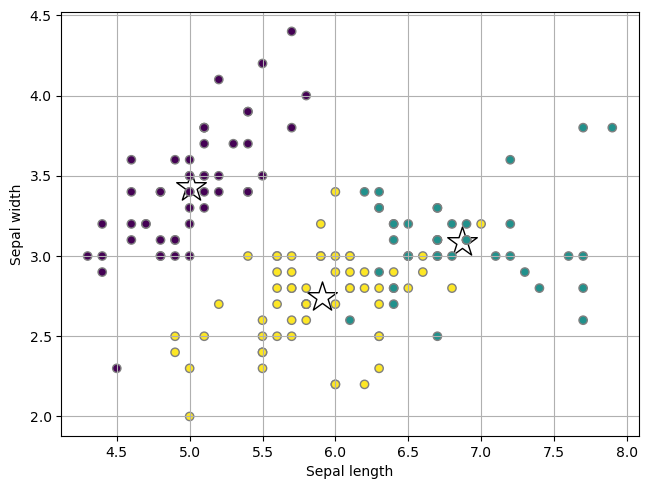

In [30]:
k = 3
clusters = plot_KM(X, k)
clusters.xlabel("Sepal length")
clusters.ylabel("Sepal width")
clusters.show()
#print(centres)

Функционал качества (сумма расстояний каждого кластера): [10.11107143  2.63058824  2.63058824]
Центры кластеров: 
[[6.86944444 3.08611111 5.76944444 2.10555556]
 [5.9203125  2.7515625  4.4203125  1.434375  ]
 [5.006      3.428      1.462      0.246     ]]


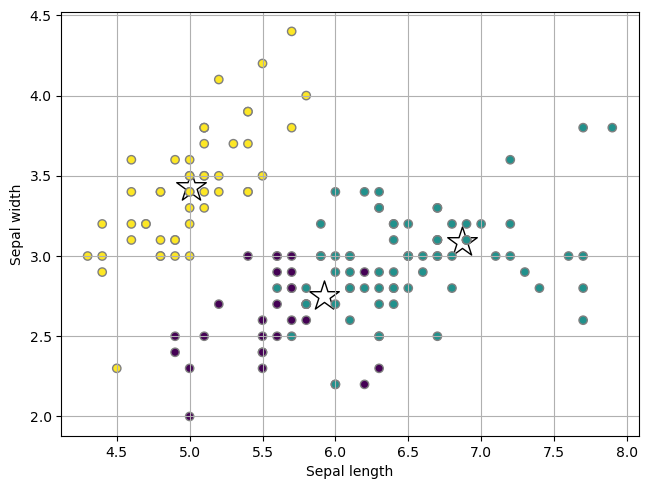

In [28]:
clusters = plot_KM(X, k)
clusters.xlabel("Sepal length")
clusters.ylabel("Sepal width")
clusters.show()

Функционал качества (сумма расстояний каждого кластера): [ 5.05034483 15.151       2.77619048]
Центры кластеров: 
[[6.9125     3.1        5.846875   2.13125   ]
 [6.485      2.785      4.855      1.57      ]
 [5.36326531 3.09897959 2.85204082 0.81938776]]


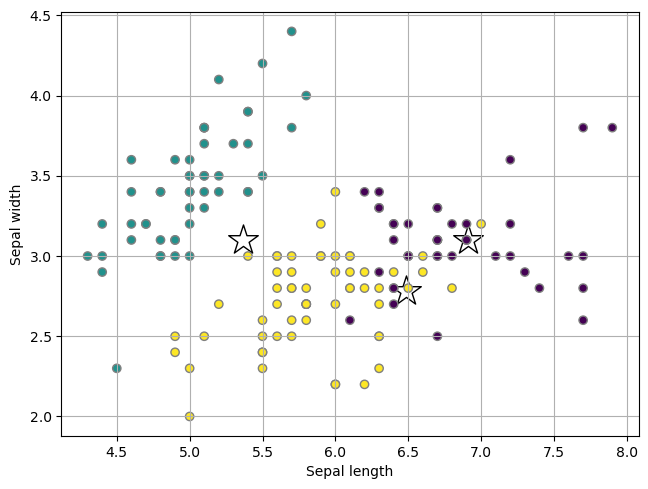

In [29]:
clusters = plot_KM(X, k)
clusters.xlabel("Sepal length")
clusters.ylabel("Sepal width")
clusters.show()

In [31]:
def DataFrame_split_XY(df):
        dfX = df.drop(df.columns[len(df.columns) - 1], axis=1)
        dfX = dfX.values
        dfY = df[df.columns[len(df.columns) - 1]]
        dfY = dfY.values
        return dfX, dfY

In [32]:
column_names = ["1. area", "2. perimeter", "3. compactness = 4*pi*A/P^2", "4. length of kernel", "5. width of kernel", "6. asymmetry coefficient", "7. length of kernel groove", "8. wheat: Kama, Rosa and Canadian"]
seeds = pd.read_csv('C:/Users/hasse/source/repos/just_bsu/datasets/seeds_dataset.txt', sep='\t',encoding='utf-8', names=column_names)
seedX, seedY = DataFrame_split_XY(seeds)
seedY -= 1

In [33]:
column_names = ["0. Class", "1. Alcohol", "2. Malic acid", "3. Ash", "4. Alcalinity of ash", "5. Magnesium", "6. Total phenols", "7. Flavanoids", "8. Nonflavanoid phenols", "9. Proanthocyanins", "10. Color intensity", "11. Hue", "12. OD280/OD315 of diluted wines", "13. Proline"]
wine = pd.read_csv('C:/Users/hasse/source/repos/just_bsu/datasets/wine.data', sep=',',encoding='utf-8', names=column_names)
wineX = wine.drop(wine.columns[0], axis=1)
wineX = wineX.values
wineY = wine[wine.columns[0]]
wineY = wineY.values
wineY -= 1

Функционал качества (сумма расстояний каждого кластера): [166.81959479 166.81959479 166.81959479]
Центры кластеров: 
[[18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
   6.06609836]
 [14.60094595 14.43635135  0.87919595  5.55486486  3.27283784  2.66113784
   5.18245946]
 [11.93973333 13.26693333  0.851452    5.22916     2.86712     4.80398667
   5.09548   ]]


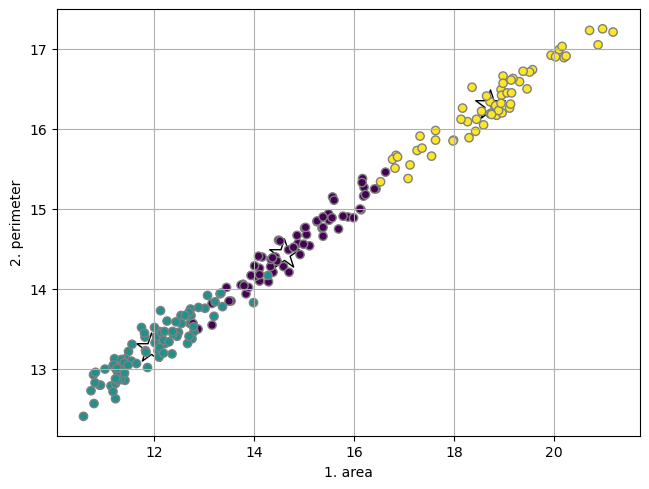

In [34]:
k = 3
clusterseed = plot_KM(seedX, k)
clusterseed.xlabel("1. area")
clusterseed.ylabel("2. perimeter")
clusters.show()
#centres, predict = K_MEANS(seedX, k)
#plt.grid(True)
#classes = np.unique(seedY)
#plt.scatter(centres[:, 0], centres[:, 1], cmap='viridis', marker='*', s=500, edgecolors='black')
#plt.scatter(seedX[:, 0], seedX[:, 1], c=predict, edgecolors='grey')
#plt.tight_layout(pad=1.08)
#plt.xlabel("1. area")
#plt.ylabel("2. perimeter")
#plt.show()

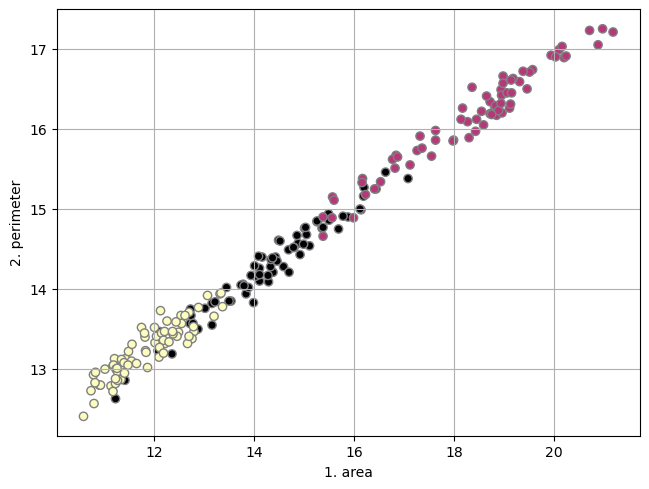

In [37]:
#centres, predict = K_MEANS(seedX, k)
plt.grid(True)
#classes = np.unique(seedY)
#plt.scatter(centres[:, 0], centres[:, 1], cmap='magma', marker='*', s=800, edgecolors='black')
plt.scatter(seedX[:, 0], seedX[:, 1], c=seedY, cmap='magma', edgecolors='grey')
plt.tight_layout(pad=1.08)
plt.xlabel("1. area")
plt.ylabel("2. perimeter")
plt.show()

Функционал качества (сумма расстояний каждого кластера): [443166.72075939 370990.0588      53171.2456    ]
Центры кластеров: 
[[1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.25119118e+01 2.48735294e+00 2.28382353e+00 2.07764706e+01
  9.22205882e+01 2.06705882e+00 1.77544118e+00 3.88088235e-01
  1.46132353e+00 4.07470587e+00 9.41911765e-01 2.49573529e+00
  4.56294118e+02]
 [1.29284127e+01 2.51126984e+00 2.41126984e+00 1.99555556e+01
  1.03555556e+02 2.11444444e+00 1.56841270e+00 3.90634921e-01
  1.49238095e+00 5.63873016e+00 8.84063492e-01 2.36206349e+00
  7.26142857e+02]]


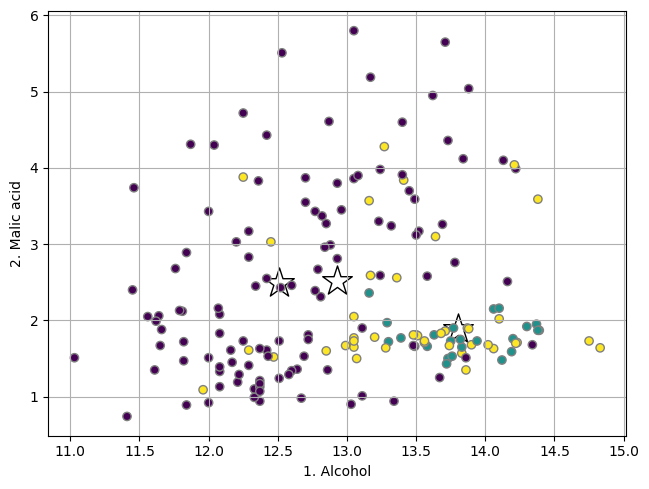

In [60]:
k = 3
clusterwine = plot_KM(wineX, k)
clusterwine.xlabel("1. Alcohol")
clusterwine.ylabel("2. Malic acid")
clusters.show()

Функционал качества (сумма расстояний каждого кластера): [297725.05969678 425459.22868541 584303.7917675 ]


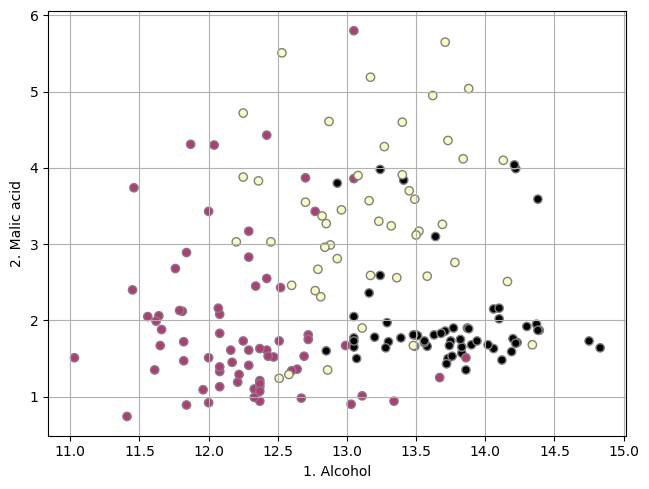

In [56]:
centres, predict = K_MEANS(wineX, k)
plt.grid(True)
classes = np.unique(wineY)
#plt.scatter(centres[:, 0], centres[:, 1], marker='*', s=800, edgecolors='black')
plt.scatter(wineX[:, 0], wineX[:, 1], c=wineY, cmap='magma', edgecolors='grey')
plt.tight_layout(pad=1.08)
plt.xlabel("1. Alcohol")
plt.ylabel("2. Malic acid")
plt.show()

In [ ]:
#X_train, X_test, Y_train, Y_test = split_data(X, Y, 0.2)
#predict_Y_train = np.zeros(len(Y_train))
#predict_Y_test = np.zeros(len(Y_test))
_c = np.zeros(k)
_p = np.zeros(len(X))
qq = Quality(X, pred, centres)
print(qq)
for t in range(10):
    centres = InitializationCentre(X, 3)
    _c = centres + 0.1
    while (centres != _c).all():
        _c = centres
        pred = Expectation(X, centres)
        centres = Maximization(X, centres, pred)
    q1 = Quality(X, pred, centres)
    for i in range(len(q1)):
        if q1[i] < qq[i]:
            _c[i] = centres[i]
            _p = Expectation(X, _c)
            qq = q1
print(qq)
print(_c)
print(_p)

In [ ]:
_c, _p = K_MEANS(X, k)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.grid(True)
#plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='magma', edgecolors='grey')
#formatter = plt.FuncFormatter(lambda i, args: iris.target_names[int(i)]) #labelling the bar
#plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.scatter(_c[:, 0], _c[:, 1], c=[0, 1, 2], cmap='magma', marker='*', s=1000, edgecolors='black')
plt.scatter(X[:, 0], X[:, 1], c=_p, cmap='magma', edgecolors='grey')
plt.tight_layout(pad=1.08)
plt.show()
plt.clf()

In [ ]:
centres, predict = K_MEANS(X, k)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='magma', edgecolors='grey')
#formatter = plt.FuncFormatter(lambda i, args: iris.target_names[int(i)]) #labelling the bar
#plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.scatter(centres[:, 0], centres[:, 1], cmap='Pastel1', edgecolors='grey')
plt.tight_layout(pad=1.08)
plt.show()
plt.clf()

In [ ]:
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.grid(True)
#plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='magma', edgecolors='grey')
#formatter = plt.FuncFormatter(lambda i, args: iris.target_names[int(i)]) #labelling the bar
#plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.scatter(centres[:, 0], centres[:, 1], c=[0, 1, 2], cmap='viridis', marker='*', s=1000, edgecolors='black')
plt.scatter(X[:, 0], X[:, 1], c=pred, edgecolors='grey')
plt.tight_layout(pad=1.08)
print(centres)
plt.show()
plt.clf()

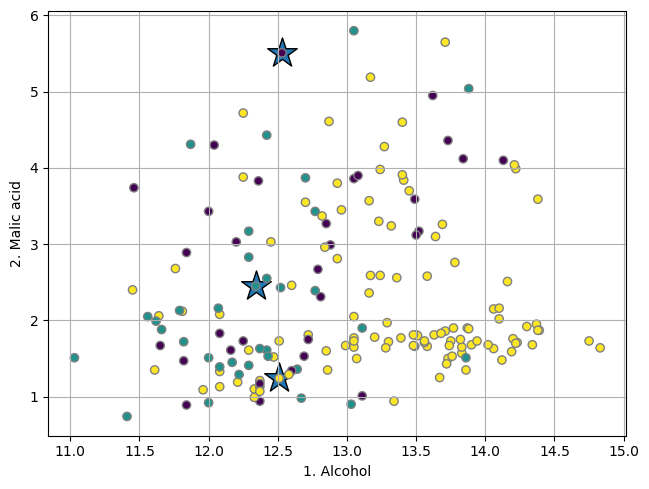

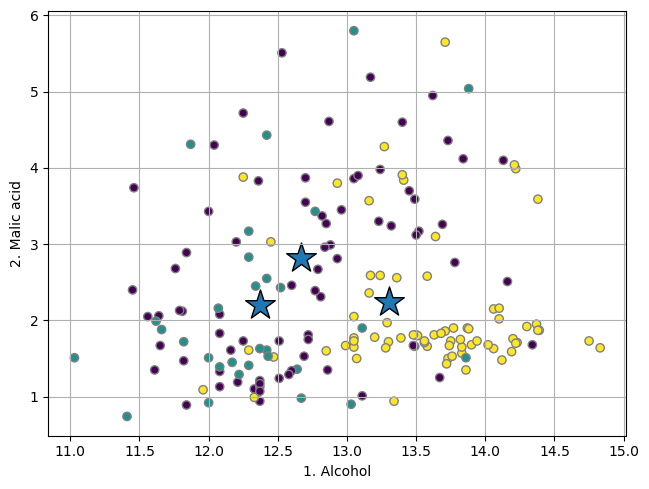

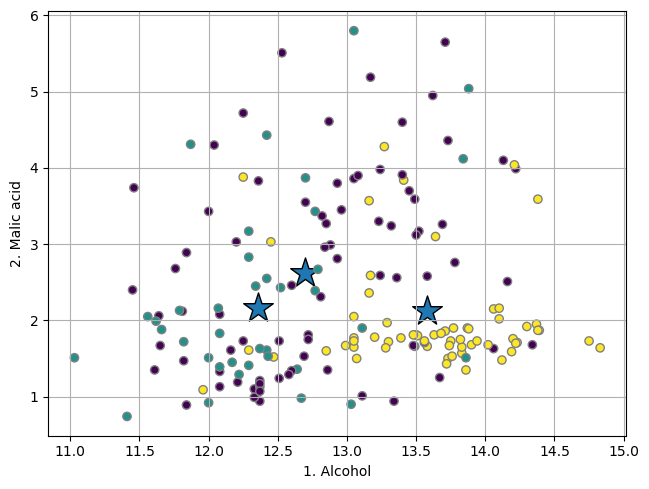

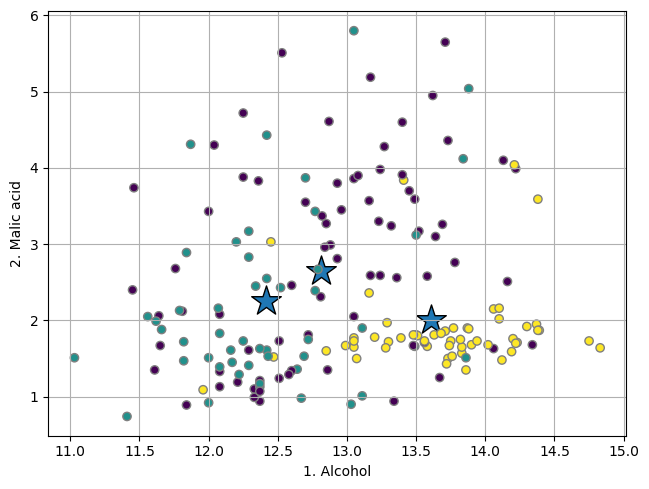

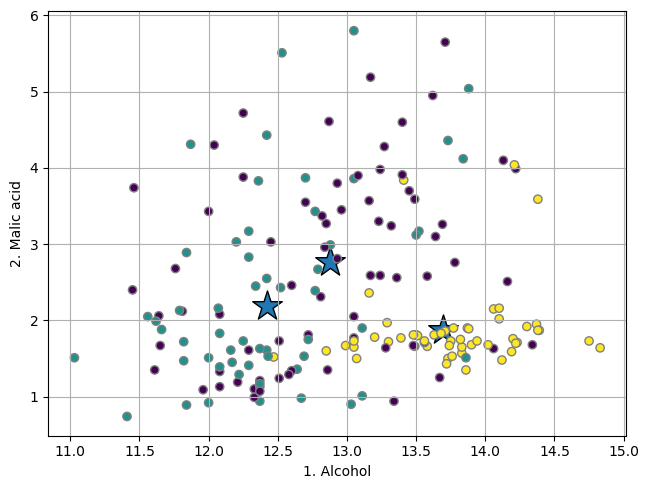

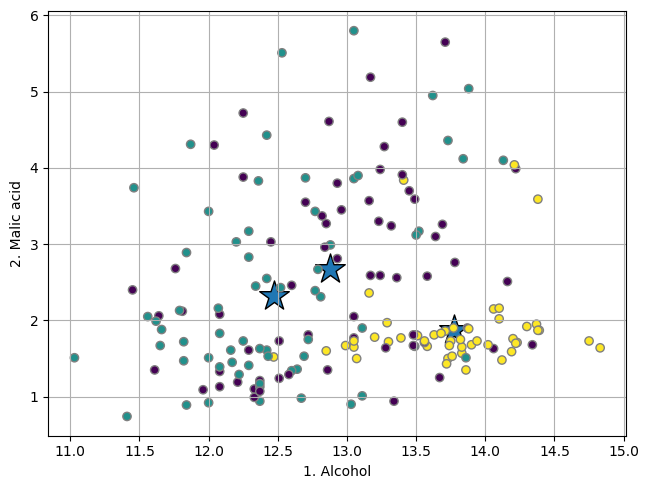

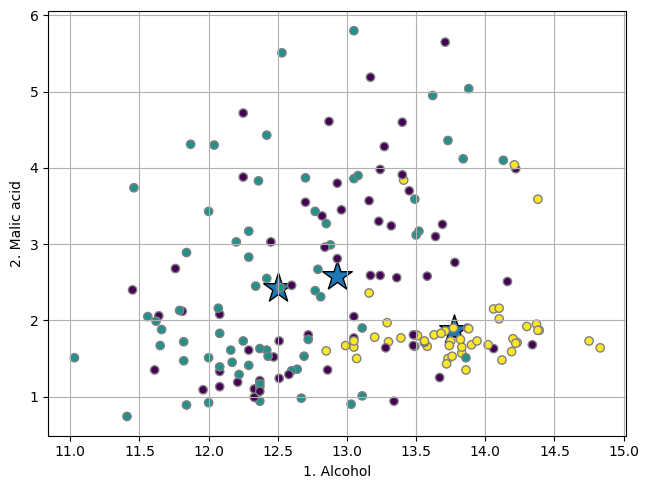

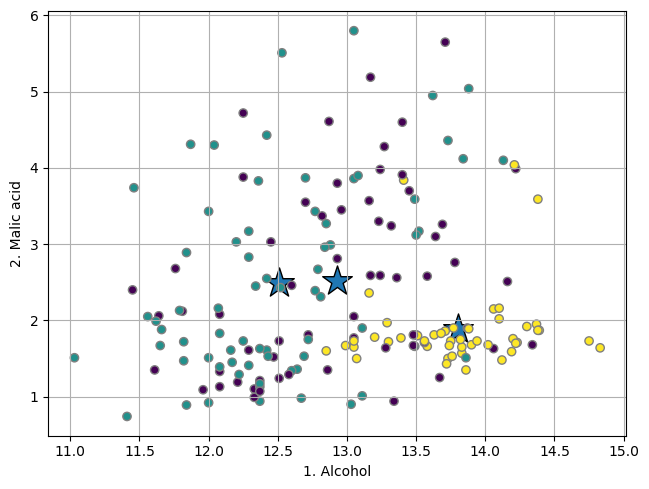

In [62]:
X = wineX
k = 3
ccc = InitializationCentre(X, k)
ciris = ccc + 0.1
while (ccc != ciris).all():
    ciris = ccc
    pred = Expectation(X, ccc)
    ccc = Maximization(X, ccc, pred)
    plt.figure()
    plt.grid(True)
    classes = np.unique(Y)
    plt.scatter(ciris[:, 0], ciris[:, 1], cmap='viridis', marker='*', s=500, edgecolors='black')
    plt.scatter(X[:, 0], X[:, 1], c=pred, edgecolors='grey')
    plt.tight_layout(pad=1.08)
    plt.xlabel("1. Alcohol")
    plt.ylabel("2. Malic acid")
    plt.show()

- if a == 0:
        a+=1
        plt.figure()
        plt.grid(True)
        plt.scatter(ccc[:, 0], ccc[:, 1], cmap='inferno', marker='*', s=500, edgecolors='black')
        plt.scatter(X[:, 0], X[:, 1], c=pred, edgecolors='grey')
        plt.tight_layout(pad=1.08)
        plt.xlabel("Sepal length")
        plt.ylabel("Sepal width")
        plt.title('Инициализация центров')
        plt.show()

- 